## 3. Pose Estimation

### `03_pose_estimation.ipynb`

Models loaded successfully!
Testing YOLO11-pose on fall videos...

Testing YOLO11-pose on workout videos...

Processing: barbell biceps curl_1.mp4

0: 384x640 1 person, 109.0ms
Speed: 4.3ms preprocess, 109.0ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 60.3ms
Speed: 3.1ms preprocess, 60.3ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 63.9ms
Speed: 2.8ms preprocess, 63.9ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 62.8ms
Speed: 2.3ms preprocess, 62.8ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 61.1ms
Speed: 2.6ms preprocess, 61.1ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 61.0ms
Speed: 2.7ms preprocess, 61.0ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 60.3ms
Speed: 3.3ms preprocess, 60.3ms inference, 1.3ms postprocess per i

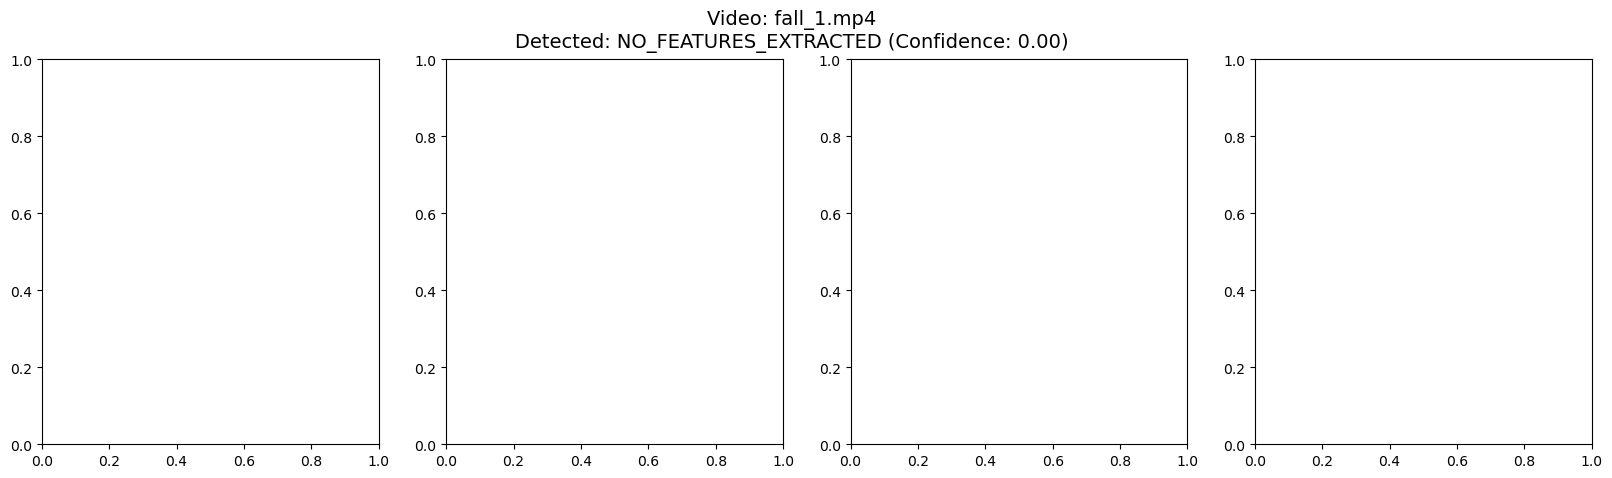

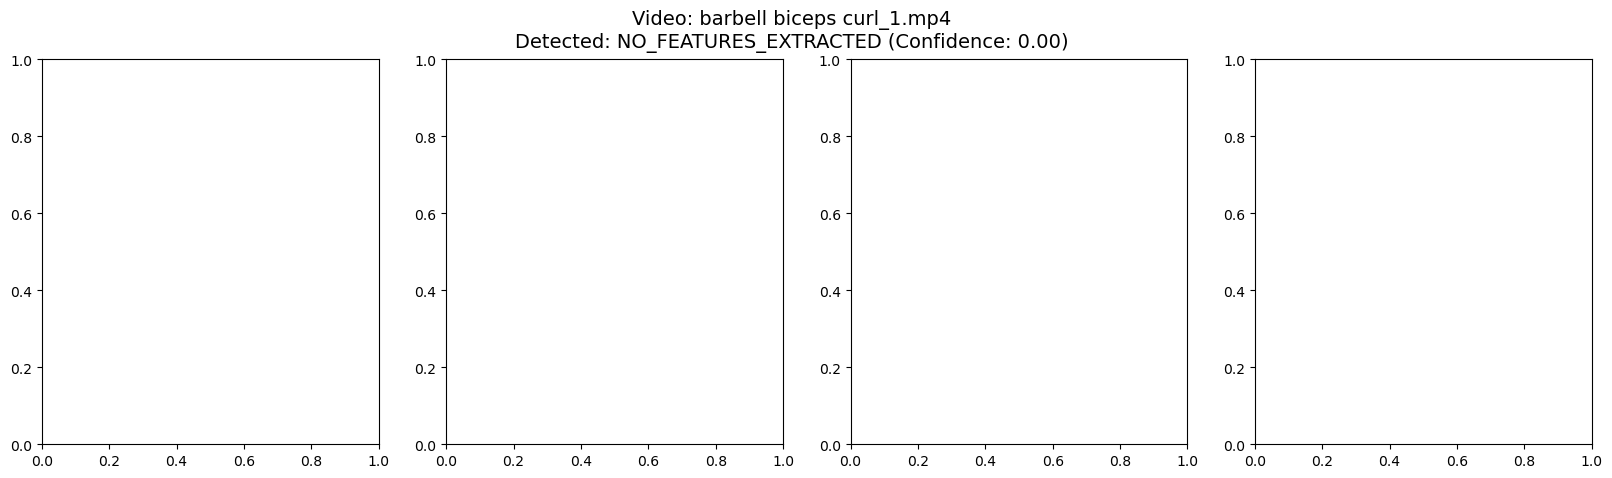

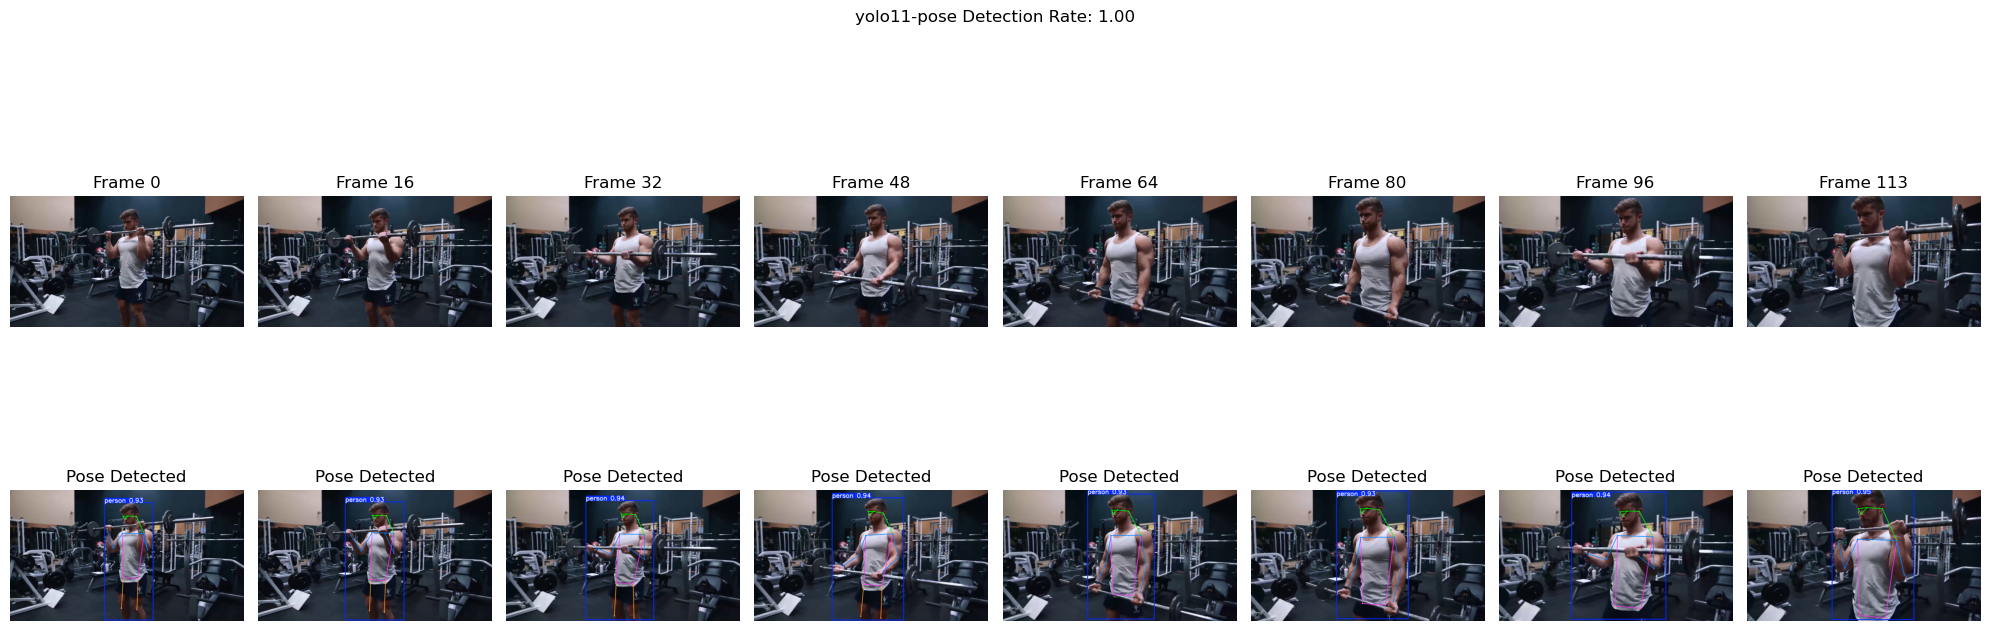


Processing: barbell biceps curl_10.mp4

0: 384x640 1 person, 61.0ms
Speed: 3.0ms preprocess, 61.0ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 57.6ms
Speed: 1.9ms preprocess, 57.6ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 60.6ms
Speed: 2.7ms preprocess, 60.6ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 50.1ms
Speed: 2.4ms preprocess, 50.1ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 47.1ms
Speed: 1.5ms preprocess, 47.1ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 51.4ms
Speed: 1.9ms preprocess, 51.4ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 52.5ms
Speed: 1.7ms preprocess, 52.5ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 45.3ms
Speed: 1.7ms preprocess, 45.3ms inference, 1.0ms 

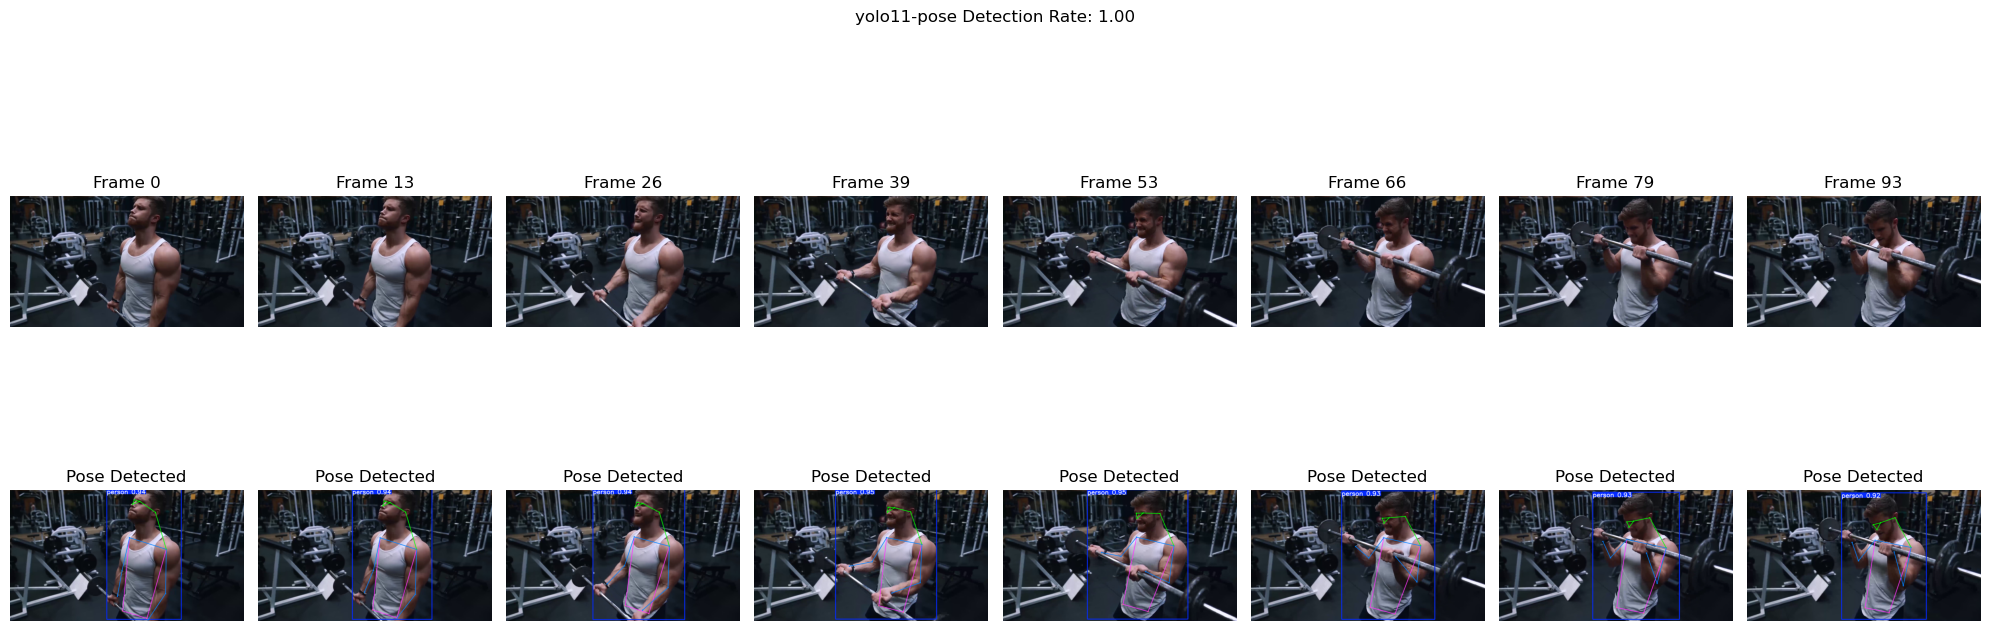


Processing: barbell biceps curl_11.mp4

0: 384x640 1 person, 68.6ms
Speed: 3.1ms preprocess, 68.6ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 63.7ms
Speed: 2.3ms preprocess, 63.7ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 63.4ms
Speed: 2.6ms preprocess, 63.4ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 73.3ms
Speed: 2.9ms preprocess, 73.3ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 113.8ms
Speed: 3.7ms preprocess, 113.8ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 101.9ms
Speed: 2.5ms preprocess, 101.9ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 87.6ms
Speed: 2.3ms preprocess, 87.6ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 56.0ms
Speed: 2.0ms preprocess, 56.0ms inference, 1.

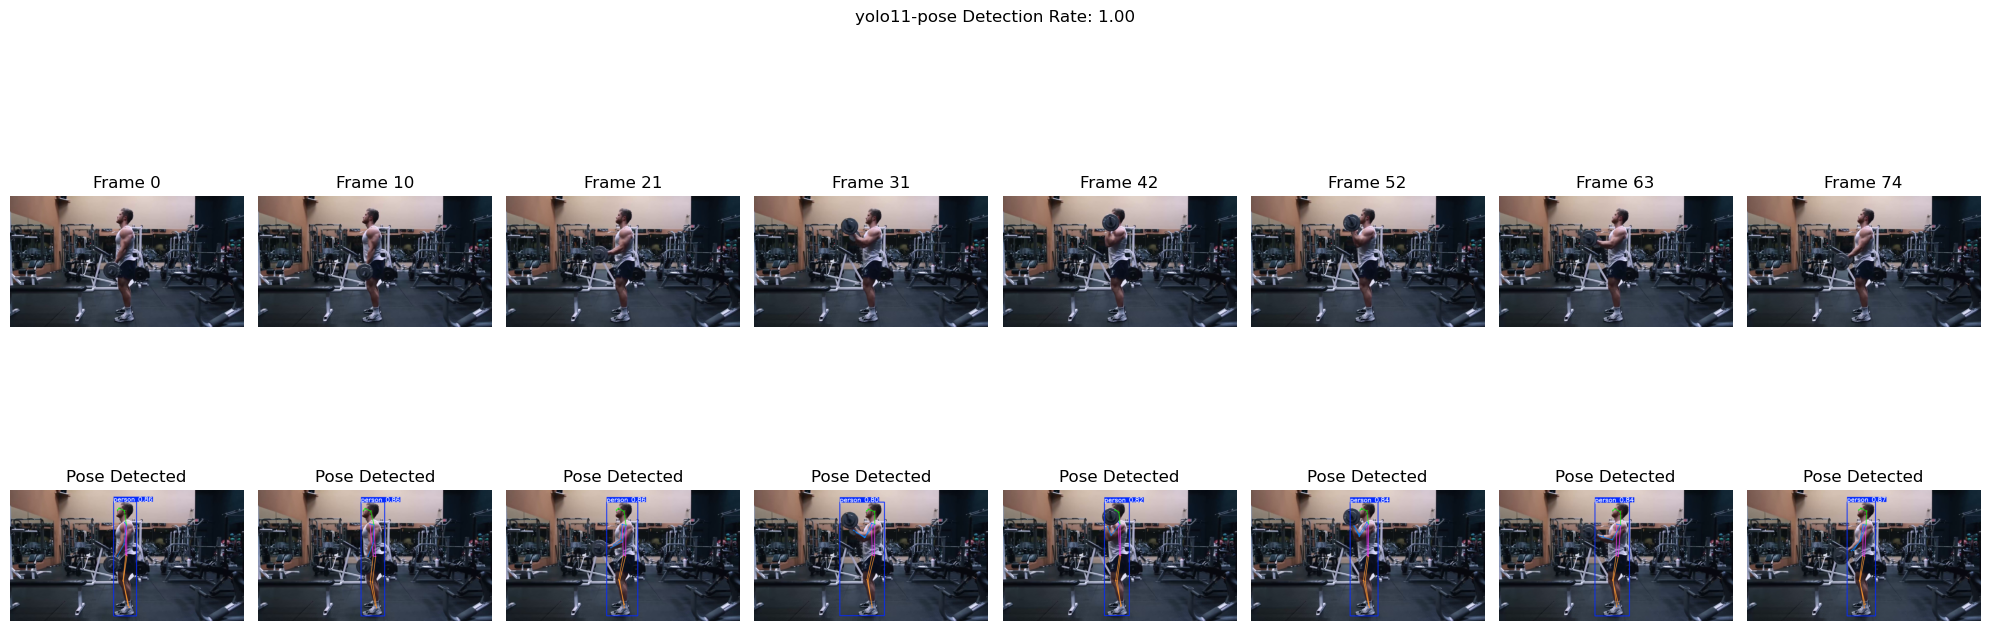


Comparing detection methods...
Comparing on: barbell biceps curl_1.mp4

0: 384x640 1 person, 60.0ms
Speed: 1.9ms preprocess, 60.0ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 46.3ms
Speed: 2.7ms preprocess, 46.3ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 46.7ms
Speed: 2.4ms preprocess, 46.7ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 47.9ms
Speed: 2.1ms preprocess, 47.9ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 43.9ms
Speed: 2.2ms preprocess, 43.9ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 45.7ms
Speed: 2.2ms preprocess, 45.7ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 42.4ms
Speed: 2.4ms preprocess, 42.4ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 45.2ms
Speed: 2.1ms prep

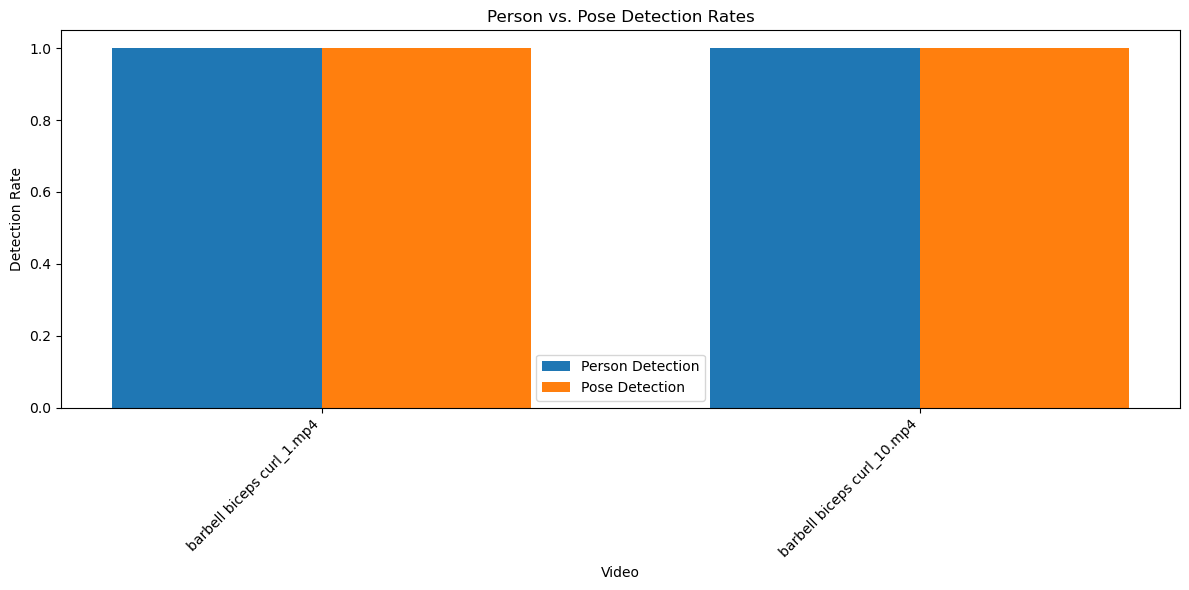


Testing feature extraction from YOLO11-pose keypoints...


In [35]:
# Import necessary libraries
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from ultralytics import YOLO
import pandas as pd
%matplotlib inline

# Set paths
FALL_DATA_DIR = "../data/le2i"
WORKOUT_VIDEOS_DIR = "../data/workout_videos"
OUTPUT_DIR = "../outputs/pose_estimation"
os.makedirs(OUTPUT_DIR, exist_ok=True)

# Initialize YOLO11 Pose model
pose_model = YOLO('yolo11n-pose.pt')
person_model = YOLO('yolo11n.pt')  # For person detection comparison

print("Models loaded successfully!")

# Function to extract pose keypoints from frames using YOLO11-pose
def extract_yolo_pose_from_video(video_path, output_frames=8):
    """Extract pose keypoints from video frames using YOLO11-pose"""
    cap = cv2.VideoCapture(video_path)
    frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    
    # Get evenly spaced frame indices
    indices = np.linspace(0, frame_count-1, output_frames, dtype=int)
    
    # Create figure to display results
    fig, axes = plt.subplots(2, output_frames, figsize=(20, 8))
    
    # Lists to store results
    pose_keypoints_list = []
    pose_detected = []
    
    for i, idx in enumerate(indices):
        cap.set(cv2.CAP_PROP_POS_FRAMES, idx)
        ret, frame = cap.read()
        
        if not ret:
            # If frame can't be read, show empty frame
            axes[0, i].imshow(np.zeros((300, 300, 3), dtype=np.uint8))
            axes[1, i].imshow(np.zeros((300, 300, 3), dtype=np.uint8))
            pose_keypoints_list.append(None)
            pose_detected.append(False)
            continue
            
        # Convert BGR to RGB for display
        rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        
        # Display original frame
        axes[0, i].imshow(rgb_frame)
        axes[0, i].set_title(f"Frame {idx}")
        axes[0, i].axis('off')
        
        # Run YOLO11-pose
        pose_results = pose_model(frame)
        
        # Get keypoints if any person is detected
        keypoints = None
        if pose_results[0].keypoints.data.shape[0] > 0:
            # Plot pose results
            pose_frame = pose_results[0].plot()
            pose_frame_rgb = cv2.cvtColor(pose_frame, cv2.COLOR_BGR2RGB)
            
            # Extract keypoints from the largest person (by bbox area)
            kpts = pose_results[0].keypoints.data  # [num_people, 17, 3] - (x, y, confidence)
            
            # Calculate bounding box areas
            areas = []
            for j in range(kpts.shape[0]):
                person_kpts = kpts[j, :, :2].cpu().numpy()  # Only x,y coords
                valid_kpts = person_kpts[person_kpts[:, 0] > 0]
                if len(valid_kpts) > 0:
                    x_min, y_min = np.min(valid_kpts, axis=0)
                    x_max, y_max = np.max(valid_kpts, axis=0)
                    area = (x_max - x_min) * (y_max - y_min)
                    areas.append((j, area))
            
            # Get the largest person
            if areas:
                largest_idx, _ = max(areas, key=lambda x: x[1])
                keypoints = kpts[largest_idx].cpu().numpy()  # [17, 3]
                pose_detected.append(True)
            else:
                pose_detected.append(False)
                
            # Display pose frame
            axes[1, i].imshow(pose_frame_rgb)
            if keypoints is not None:
                axes[1, i].set_title("Pose Detected")
            else:
                axes[1, i].set_title("No Valid Pose")
        else:
            # No pose detected
            axes[1, i].imshow(rgb_frame)
            axes[1, i].set_title("No Pose")
            pose_detected.append(False)
        
        axes[1, i].axis('off')
        pose_keypoints_list.append(keypoints)
    
    cap.release()
    
    # Show detection rate
    detection_rate = sum(pose_detected) / len(pose_detected)
    plt.suptitle(f"yolo11-pose Detection Rate: {detection_rate:.2f}", y=0.98)
    plt.tight_layout()
    plt.show()
    
    return pose_keypoints_list, pose_detected
# Test on fall videos
print("Testing YOLO11-pose on fall videos...")
fall_videos = list(Path(FALL_DATA_DIR).rglob("*fall*.avi"))[:3]  # First 3 videos

for video_path in fall_videos:
    print(f"\nProcessing: {video_path.name}")
    _, _ = extract_yolo_pose_from_video(str(video_path))

# Test on workout videos
print("\nTesting YOLO11-pose on workout videos...")
workout_videos = list(Path(WORKOUT_VIDEOS_DIR).rglob("*.mp4"))[:3]  # First 3 videos

for video_path in workout_videos:
    print(f"\nProcessing: {video_path.name}")
    _, _ = extract_yolo_pose_from_video(str(video_path))

# Compare YOLO11-pose with YOLO11 person detection
def compare_detection_methods(video_path):
    """Compare person detection vs. pose detection"""
    cap = cv2.VideoCapture(video_path)
    
    # Sample 10 frames
    frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    indices = np.linspace(0, frame_count-1, 10, dtype=int)
    
    results = {
        'frame_idx': [],
        'person_detected': [],
        'pose_detected': [],
        'num_people': [],
        'num_poses': []
    }
    
    for idx in indices:
        cap.set(cv2.CAP_PROP_POS_FRAMES, idx)
        ret, frame = cap.read()
        
        if not ret:
            continue
        
        # Person detection
        person_results = person_model(frame, classes=[0])
        num_people = len(person_results[0].boxes)
        person_detected = num_people > 0
        
        # Pose detection
        pose_results = pose_model(frame)
        num_poses = pose_results[0].keypoints.data.shape[0]
        pose_detected = num_poses > 0
        
        # Store results
        results['frame_idx'].append(idx)
        results['person_detected'].append(person_detected)
        results['pose_detected'].append(pose_detected)
        results['num_people'].append(num_people)
        results['num_poses'].append(num_poses)
    
    cap.release()
    
    return results

# Compare on some videos
print("\nComparing detection methods...")
comparison_results = []

test_videos = fall_videos[:2] + workout_videos[:2]
for video_path in test_videos:
    print(f"Comparing on: {video_path.name}")
    results = compare_detection_methods(str(video_path))
    
    # Calculate detection rates
    person_detection_rate = sum(results['person_detected']) / len(results['person_detected'])
    pose_detection_rate = sum(results['pose_detected']) / len(results['pose_detected'])
    
    print(f"  Person detection rate: {person_detection_rate:.2f}")
    print(f"  Pose detection rate: {pose_detection_rate:.2f}")
    
    comparison_results.append({
        'video': video_path.name,
        'person_rate': person_detection_rate,
        'pose_rate': pose_detection_rate,
        'avg_people': sum(results['num_people']) / len(results['num_people']),
        'avg_poses': sum(results['num_poses']) / len(results['num_poses'])
    })

# Plot comparison results
comparison_df = pd.DataFrame(comparison_results)
comparison_df = comparison_df.sort_values('video')

plt.figure(figsize=(12, 6))
width = 0.35
x = np.arange(len(comparison_df))

plt.bar(x - width/2, comparison_df['person_rate'], width, label='Person Detection')
plt.bar(x + width/2, comparison_df['pose_rate'], width, label='Pose Detection')

plt.xlabel('Video')
plt.ylabel('Detection Rate')
plt.title('Person vs. Pose Detection Rates')
plt.xticks(x, comparison_df['video'], rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

# Function to extract standard pose features from YOLO keypoints
def extract_pose_features(keypoints_list):
    """Extract standard pose features from YOLO keypoints"""
    if not keypoints_list or not any(kp is not None for kp in keypoints_list):
        return None
    
    # Filter out None entries
    valid_keypoints = [kp for kp in keypoints_list if kp is not None]
    
    if not valid_keypoints:
        return None
    
    # YOLO11-pose keypoint order: 
    # [nose, left_eye, right_eye, left_ear, right_ear, left_shoulder, right_shoulder, 
    #  left_elbow, right_elbow, left_wrist, right_wrist, left_hip, right_hip, 
    #  left_knee, right_knee, left_ankle, right_ankle]
    
    # Define indices for key joints
    nose_idx = 0
    neck_idx = None  # Calculate as midpoint between shoulders
    shoulders = [5, 6]  # left_shoulder, right_shoulder
    elbows = [7, 8]  # left_elbow, right_elbow
    wrists = [9, 10]  # left_wrist, right_wrist
    hips = [11, 12]  # left_hip, right_hip
    knees = [13, 14]  # left_knee, right_knee
    ankles = [15, 16]  # left_ankle, right_ankle
    
    # Features to extract
    features = {}
    
    # 1. Calculate height variation (head to feet distance)
    heights = []
    for kp in valid_keypoints:
        # Get nose and ankle positions
        if kp[nose_idx, 2] > 0 and (kp[ankles[0], 2] > 0 or kp[ankles[1], 2] > 0):
            nose_y = kp[nose_idx, 1]
            
            # Use whichever ankle is visible
            if kp[ankles[0], 2] > 0:
                ankle_y = kp[ankles[0], 1]
            else:
                ankle_y = kp[ankles[1], 1]
                
            height = abs(nose_y - ankle_y)
            heights.append(height)
    
    if heights:
        features['max_height'] = np.max(heights)
        features['min_height'] = np.min(heights)
        features['height_range'] = np.max(heights) - np.min(heights)
        features['mean_height'] = np.mean(heights)
    
    # 2. Calculate width (shoulder width or overall width)
    widths = []
    for kp in valid_keypoints:
        # If both shoulders are visible
        if kp[shoulders[0], 2] > 0 and kp[shoulders[1], 2] > 0:
            shoulder_width = abs(kp[shoulders[0], 0] - kp[shoulders[1], 0])
            widths.append(shoulder_width)
            
        # Also calculate overall pose width
        valid_x = kp[kp[:, 2] > 0, 0]
        if len(valid_x) > 1:
            overall_width = np.max(valid_x) - np.min(valid_x)
            widths.append(overall_width)
    
    if widths:
        features['max_width'] = np.max(widths)
        features['min_width'] = np.min(widths)
        features['width_range'] = np.max(widths) - np.min(widths)
    
    # 3. Calculate joint velocities between frames
    if len(valid_keypoints) >= 2:
        # Track important joints: wrists, ankles, knees, nose
        tracked_joints = wrists + ankles + knees + [nose_idx]
        
        for joint_idx in tracked_joints:
            joint_name = f"joint_{joint_idx}"
            velocities = []
            
            for i in range(1, len(valid_keypoints)):
                # Only calculate if joint is visible in both frames
                if (valid_keypoints[i][joint_idx, 2] > 0 and 
                    valid_keypoints[i-1][joint_idx, 2] > 0):
                    
                    # Calculate Euclidean distance between consecutive frames
                    p1 = valid_keypoints[i][joint_idx, :2]
                    p2 = valid_keypoints[i-1][joint_idx, :2]
                    velocity = np.sqrt(np.sum((p1 - p2)**2))
                    velocities.append(velocity)
            
            if velocities:
                features[f'{joint_name}_max_vel'] = np.max(velocities)
                features[f'{joint_name}_mean_vel'] = np.mean(velocities)
                features[f'{joint_name}_std_vel'] = np.std(velocities) if len(velocities) > 1 else 0
    
    # 4. Calculate vertical movements (especially important for falls)
    # Track nose position changes
    if len(valid_keypoints) >= 2:
        nose_y_positions = []
        for kp in valid_keypoints:
            if kp[nose_idx, 2] > 0:
                nose_y_positions.append(kp[nose_idx, 1])
        
        if len(nose_y_positions) >= 2:
            features['nose_y_change'] = nose_y_positions[-1] - nose_y_positions[0]
            features['nose_y_max_change'] = np.max(nose_y_positions) - np.min(nose_y_positions)
            
            # Calculate rate of change
            nose_y_velocities = [nose_y_positions[i] - nose_y_positions[i-1] 
                                for i in range(1, len(nose_y_positions))]
            if nose_y_velocities:
                features['nose_y_max_velocity'] = np.max(np.abs(nose_y_velocities))
                features['nose_y_mean_velocity'] = np.mean(nose_y_velocities)
    
    # 5. Calculate angles between joints (e.g., elbow angle)
    if len(valid_keypoints) > 0:
        # Calculate average elbow angles
        left_elbow_angles = []
        right_elbow_angles = []
        
        for kp in valid_keypoints:
            # Calculate left elbow angle if all points are visible
            if (kp[shoulders[0], 2] > 0 and kp[elbows[0], 2] > 0 and kp[wrists[0], 2] > 0):
                shoulder = kp[shoulders[0], :2]
                elbow = kp[elbows[0], :2]
                wrist = kp[wrists[0], :2]
                
                # Calculate vectors
                v1 = shoulder - elbow
                v2 = wrist - elbow
                
                # Calculate angle
                cos_angle = np.dot(v1, v2) / (np.linalg.norm(v1) * np.linalg.norm(v2))
                angle = np.arccos(np.clip(cos_angle, -1.0, 1.0))
                angle_degrees = np.degrees(angle)
                left_elbow_angles.append(angle_degrees)
            
            # Calculate right elbow angle
            if (kp[shoulders[1], 2] > 0 and kp[elbows[1], 2] > 0 and kp[wrists[1], 2] > 0):
                shoulder = kp[shoulders[1], :2]
                elbow = kp[elbows[1], :2]
                wrist = kp[wrists[1], :2]
                
                # Calculate vectors
                v1 = shoulder - elbow
                v2 = wrist - elbow
                
                # Calculate angle
                cos_angle = np.dot(v1, v2) / (np.linalg.norm(v1) * np.linalg.norm(v2))
                angle = np.arccos(np.clip(cos_angle, -1.0, 1.0))
                angle_degrees = np.degrees(angle)
                right_elbow_angles.append(angle_degrees)
        
        if left_elbow_angles:
            features['left_elbow_max_angle'] = np.max(left_elbow_angles)
            features['left_elbow_min_angle'] = np.min(left_elbow_angles)
            features['left_elbow_range'] = np.max(left_elbow_angles) - np.min(left_elbow_angles)
            features['left_elbow_mean'] = np.mean(left_elbow_angles)
        
        if right_elbow_angles:
            features['right_elbow_max_angle'] = np.max(right_elbow_angles)
            features['right_elbow_min_angle'] = np.min(right_elbow_angles)
            features['right_elbow_range'] = np.max(right_elbow_angles) - np.min(right_elbow_angles)
            features['right_elbow_mean'] = np.mean(right_elbow_angles)
    
    return features

# Test feature extraction on a sample video
print("\nTesting feature extraction from YOLO11-pose keypoints...")
if fall_videos:
    sample_video = str(fall_videos[0])
    keypoints, _ = extract_yolo_pose_from_video(sample_video)
    features = extract_pose_features(keypoints)
    
    if features:
        print("\nExtracted features:")
        for key, value in features.items():
            print(f"  {key}: {value:.4f}")
    else:
        print("No valid features extracted.")

# Save keypoints and features for later use
import pickle

if fall_videos and workout_videos:
    # Process a few videos from each category
    all_data = []
    
    # Process fall videos
    for video in fall_videos[:5]:
        print(f"Processing {video.name}...")
        keypoints, detected = extract_yolo_pose_from_video(str(video))
        features = extract_pose_features(keypoints)
        
        if features:
            all_data.append({
                'video': str(video),
                'category': 'fall',
                'keypoints': keypoints,
                'features': features,
                'detection_rate': sum(detected) / len(detected) if detected else 0
            })
    
    # Process workout videos
    for video in workout_videos[:5]:
        print(f"Processing {video.name}...")
        keypoints, detected = extract_yolo_pose_from_video(str(video))
        features = extract_pose_features(keypoints)
        
        if features:
            all_data.append({
                'video': str(video),
                'category': 'workout',
                'keypoints': keypoints,
                'features': features,
                'detection_rate': sum(detected) / len(detected) if detected else 0
            })
    
    # Save the data
    with open(os.path.join(OUTPUT_DIR, 'yolo11_pose_data.pkl'), 'wb') as f:
        pickle.dump(all_data, f)
    
    print(f"\nProcessed and saved data for {len(all_data)} videos")
    
    # Create a DataFrame of just the features
    if all_data:
        features_rows = []
        for item in all_data:
            if item['features']:
                row = item['features'].copy()
                row['video'] = os.path.basename(item['video'])
                row['category'] = item['category']
                row['detection_rate'] = item['detection_rate']
                features_rows.append(row)
        
        if features_rows:
            features_df = pd.DataFrame(features_rows)
            features_df.to_csv(os.path.join(OUTPUT_DIR, 'yolo11_pose_features.csv'), index=False)
            print(f"Features saved to CSV with {len(features_df)} rows")
            
            # Display feature statistics by category
            print("\nFeature statistics by category:")
            numeric_cols = features_df.select_dtypes(include=[np.number]).columns.tolist()
            numeric_cols = [col for col in numeric_cols if col != 'detection_rate']
            
            if numeric_cols:
                stats = features_df.groupby('category')[numeric_cols].mean()
                print(stats)